<a href="https://colab.research.google.com/github/c-Tos1wa/pytorch/blob/main/dataset_dataloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Datasets 💾

O armazenamento destes dados e seus respectivos rótulos são feitos em amostras.

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
training = datasets.FashionMNIST(
    root="data", #caminho onde o dado está estocado
    train=True, #especifica que são os dados de treino, neste caso
    download=True, #faz download do dado da internet, se não estiver no caminho root
    transform=ToTensor() #especifica as transformaçÕes de feature e label
)

100%|██████████| 26.4M/26.4M [00:00<00:00, 110MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 12.0MB/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




100%|██████████| 4.42M/4.42M [00:00<00:00, 67.1MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 3.84MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
test = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

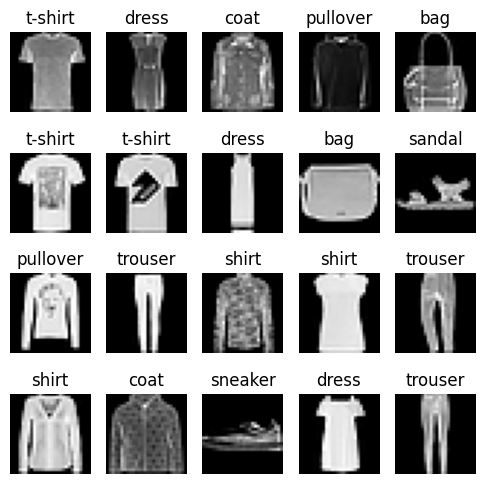

In [ ]:
labels_img = {
    0: "t-shirt",
    1: "trouser",
    2: "pullover",
    3: "dress",
    4: "coat",
    5: "sandal",
    6: "shirt",
    7: "sneaker",
    8: "bag",
    9: "ankle boot"
}
figure = plt.figure(figsize = (6, 6))
cols, rows = 5, 4
for i in range(1, cols * rows + 1):
  sample_id = torch.randint(len(training), size = (1,)).item()
  img, label = training[sample_id]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_img[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap = "gray")
plt.show()

## Dataloaders 💾

Uma "camada" que envolve o dataset e permite fácil acesso às amostras.

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_loader = DataLoader(training, batch_size = 64, shuffle = True)
test_loader = DataLoader(test, batch_size = 64, shuffle=True)

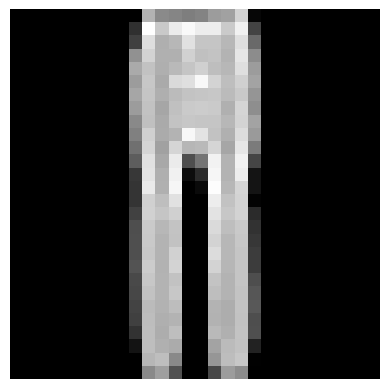

Tamanho da amostra Feature: torch.Size([64, 1, 28, 28])
Tamanho da amostra Labels: torch.Size([64])
Label: 1


In [ ]:
train_features, train_label = next(iter(train_loader))
img = train_features[0].squeeze()
label = train_label[0]
plt.imshow(img, cmap = "gray")
plt.axis("off")
plt.show()
print(f"Tamanho da amostra Feature: {train_features.size()}")
print(f"Tamanho da amostra Labels: {train_label.size()}")
print(f"Label: {label}")